In [7]:
import pandas as pd

hour = pd.read_csv("hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
hour.shape

(17379, 17)

In [9]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


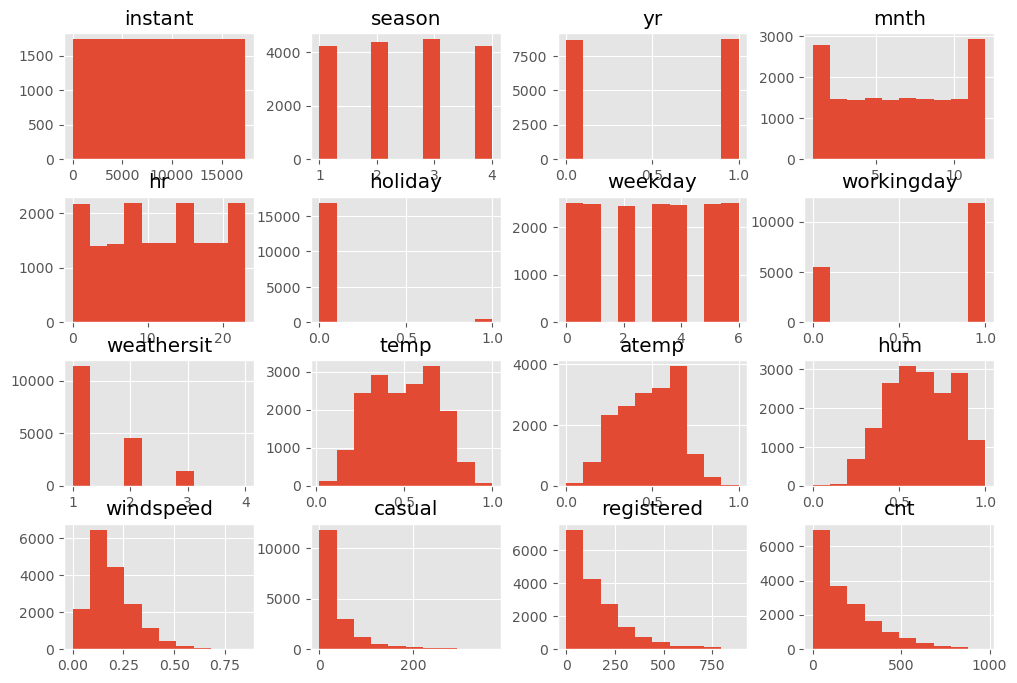

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
hour.hist(figsize=(12,8))
plt.show()

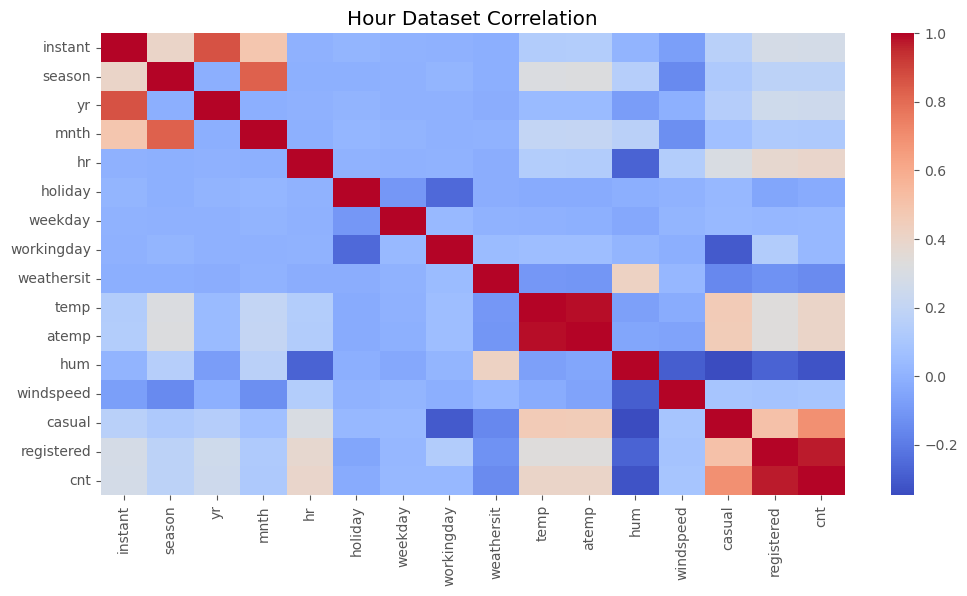

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(hour.select_dtypes(include=['int64','float64']).corr(), cmap="coolwarm")
plt.title("Hour Dataset Correlation")
plt.show()

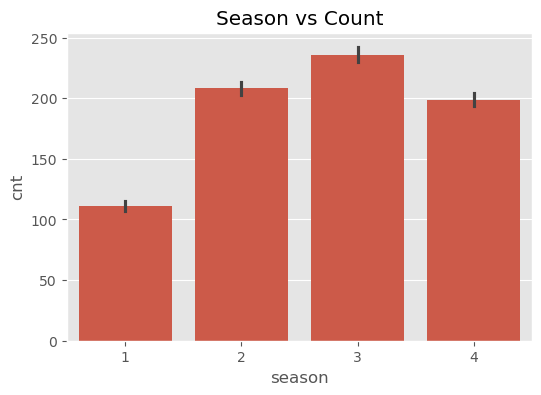

In [12]:
plt.figure(figsize=(6,4))
sns.barplot(x="season", y="cnt", data=hour)
plt.title("Season vs Count")
plt.show()

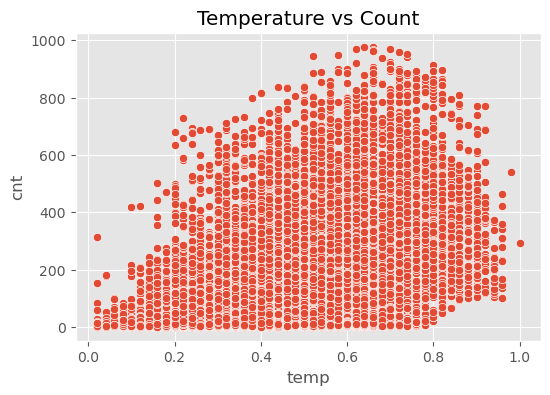

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="temp", y="cnt", data=hour)
plt.title("Temperature vs Count")
plt.show()

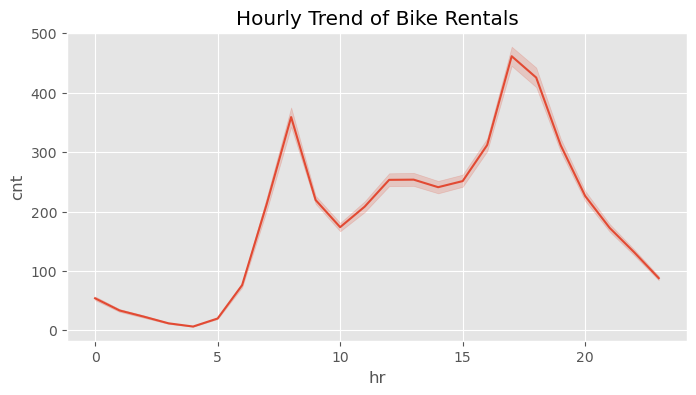

In [14]:
plt.figure(figsize=(8,4))
sns.lineplot(x="hr", y="cnt", data=hour)
plt.title("Hourly Trend of Bike Rentals")
plt.show()

In [15]:
hour = hour.drop(columns=["instant", "dteday", "yr", "casual", "registered"])
print("Hour dataset after dropping columns:")
print(hour.head().to_string(index=False))

Hour dataset after dropping columns:
 season  mnth  hr  holiday  weekday  workingday  weathersit  temp  atemp  hum  windspeed  cnt
      1     1   0        0        6           0           1  0.24 0.2879 0.81        0.0   16
      1     1   1        0        6           0           1  0.22 0.2727 0.80        0.0   40
      1     1   2        0        6           0           1  0.22 0.2727 0.80        0.0   32
      1     1   3        0        6           0           1  0.24 0.2879 0.75        0.0   13
      1     1   4        0        6           0           1  0.24 0.2879 0.75        0.0    1


In [16]:
hour.isnull().sum()

season        0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [17]:
hour_duplicates = hour.duplicated().sum()
print("Number of duplicate hours:", hour_duplicates)


Number of duplicate hours: 2


In [18]:
hour = hour.drop_duplicates() 
print("Hour dataset after dropping duplicates:")
print(hour.head().to_string(index=False))

Hour dataset after dropping duplicates:
 season  mnth  hr  holiday  weekday  workingday  weathersit  temp  atemp  hum  windspeed  cnt
      1     1   0        0        6           0           1  0.24 0.2879 0.81        0.0   16
      1     1   1        0        6           0           1  0.22 0.2727 0.80        0.0   40
      1     1   2        0        6           0           1  0.22 0.2727 0.80        0.0   32
      1     1   3        0        6           0           1  0.24 0.2879 0.75        0.0   13
      1     1   4        0        6           0           1  0.24 0.2879 0.75        0.0    1


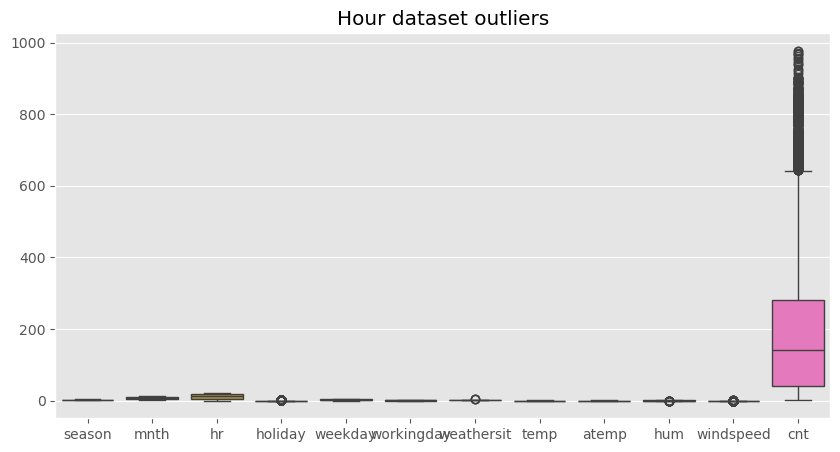

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(data=hour)
plt.title("Hour dataset outliers")
plt.show()


In [20]:
# ---- Outlier Detection for Hour Data ----
Q1_hr = hour.quantile(0.25)
Q3_hr = hour.quantile(0.75)
IQR_hr = Q3_hr - Q1_hr

lower_limit_hr = Q1_hr - 1.5 * IQR_hr
upper_limit_hr = Q3_hr + 1.5 * IQR_hr

hour_cleaned = hour[~((hour < lower_limit_hr) | (hour > upper_limit_hr)).any(axis=1)]

print("Original Hour Shape:", hour.shape)
print("After Removing Outliers:", hour_cleaned.shape)

Original Hour Shape: (17377, 12)
After Removing Outliers: (16027, 12)


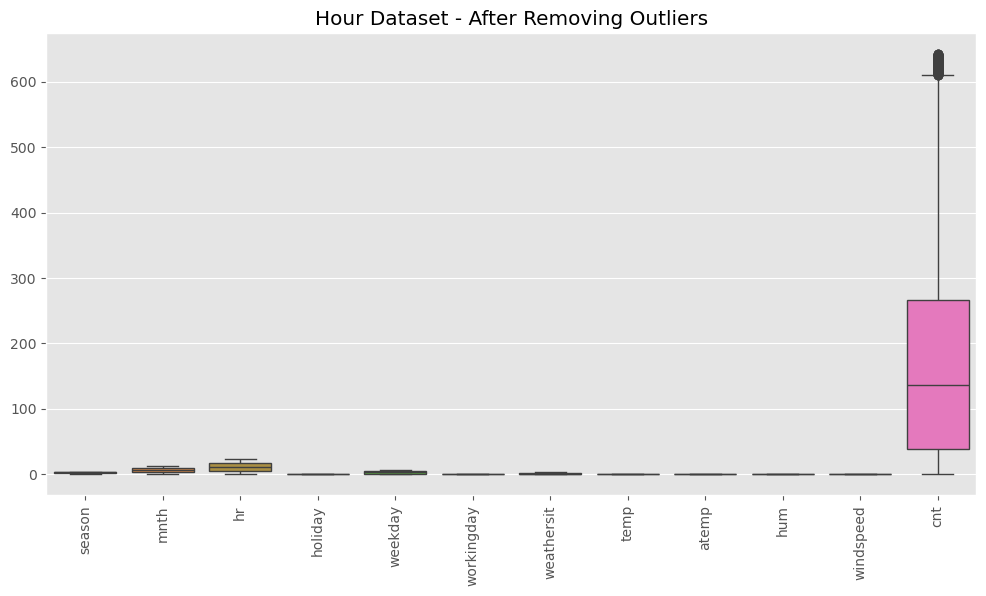

In [21]:
# ---- Boxplot after removing outliers ----
plt.figure(figsize=(12,6))
sns.boxplot(data=hour_cleaned)
plt.title("Hour Dataset - After Removing Outliers")
plt.xticks(rotation=90)
plt.show()


In [25]:
X_hour = hour.drop("cnt", axis=1)
y_hour = hour["cnt"]

In [26]:
from sklearn.model_selection import train_test_split

# Hourly data train-test split
X_train_hr, X_test_hr, y_train_hr, y_test_hr = train_test_split(X_hour, y_hour, test_size=0.2, random_state=42)


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def train_evaluate_rf(X_train, X_test, y_train, y_test, dataset_name="Dataset"):
    # Train Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Predict
    y_pred = rf.predict(X_test)
    
    # Evaluation Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
     
    print(f"{dataset_name} - Random Forest Metrics")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}\n")
    return rf,mae,rmse,r2
    

In [30]:
#Train & evaluate for both datasets
rf_hour, mae_hr, rmse_hr, r2_hr = train_evaluate_rf(
    X_train_hr, X_test_hr, y_train_hr, y_test_hr, "Hourly Data")


Hourly Data - Random Forest Metrics
MAE: 42.88, RMSE: 64.90, R²: 0.86



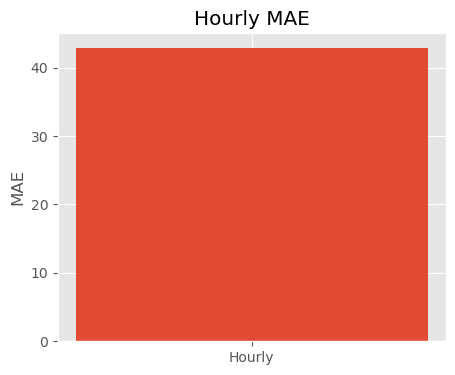

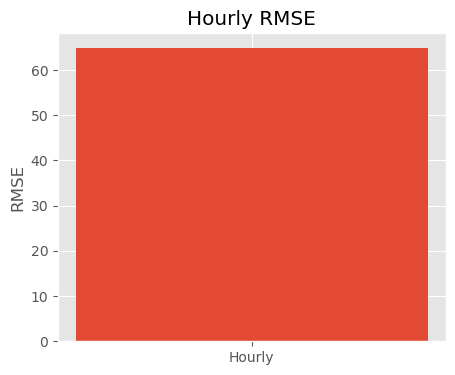

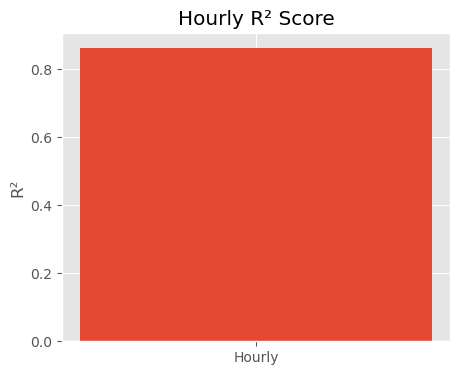

In [32]:
plt.figure(figsize=(5,4))
plt.bar(["Hourly"], [mae_hr])
plt.title("Hourly MAE")
plt.ylabel("MAE")
plt.show()

plt.figure(figsize=(5,4))
plt.bar(["Hourly"], [rmse_hr])
plt.title("Hourly RMSE")
plt.ylabel("RMSE")
plt.show()
plt.figure(figsize=(5,4))
plt.bar(["Hourly"], [r2_hr])
plt.title("Hourly R² Score")
plt.ylabel("R²")
plt.show()



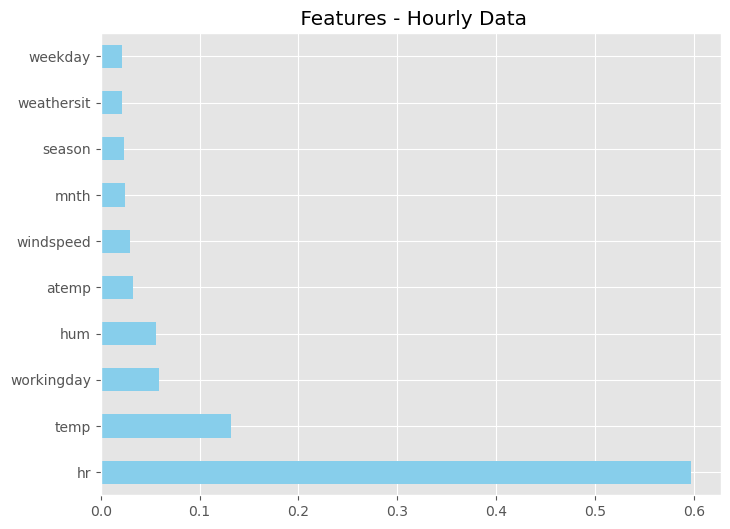

In [33]:
 # --- Feature Importance Plot ---
def plot_feature_importance(rf_model, X_train, dataset_name):
    feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
    plt.figure(figsize=(8,6))
    color = 'skyblue' if dataset_name=="Hourly Data" else 'orange'
    feat_importances.nlargest(10).plot(kind='barh', color=color)
    plt.title(f" Features - {dataset_name}")
    plt.show()

# Plot top 10 features for both datasets
plot_feature_importance(rf_hour, X_train_hr, "Hourly Data")

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:

 def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(random_state=42)
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results.append({
            "Model": name,
            "MAE": mean_absolute_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "R2": r2_score(y_test, y_pred)
        })

    return pd.DataFrame(results)

   


In [39]:
# Hourly
hour_results = train_evaluate_models(
    X_train_hr, X_test_hr, y_train_hr, y_test_hr
)
print("Hourly Results")
display(hour_results)

Hourly Results


,Model,MAE,RMSE,R2
0,Linear Regression,105.720617,141.696994,0.345995
1,Decision Tree,53.935270,88.585113,0.744388
2,Random Forest,42.876734,64.900524,0.862799


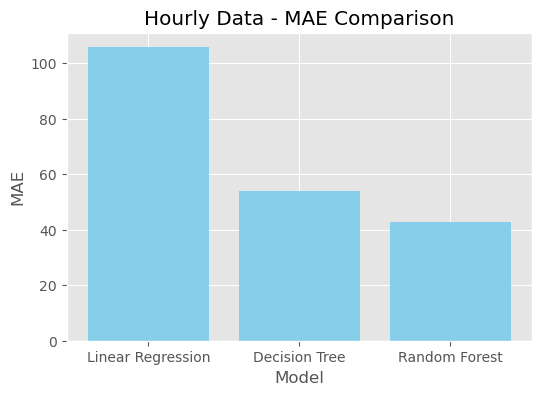

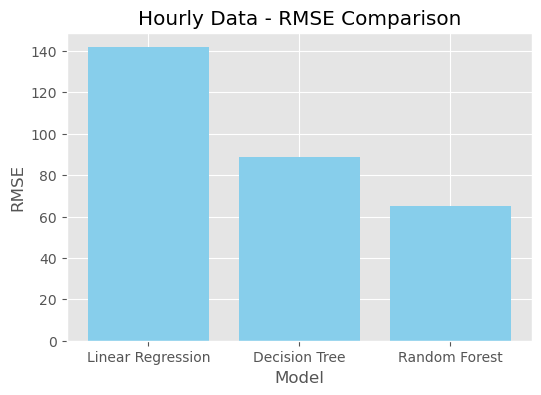

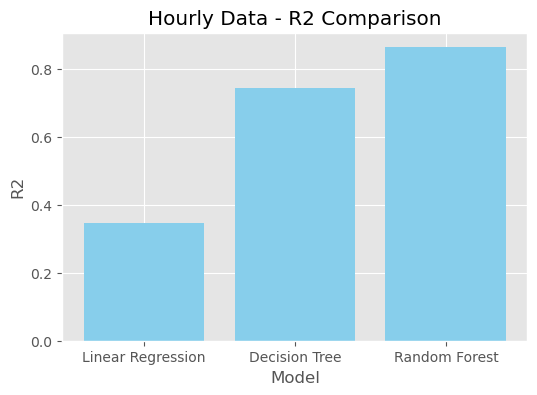

In [40]:
#Hourly Data Boxplot

metrics = ["MAE", "RMSE", "R2"]

for metric in metrics:
    plt.figure(figsize=(6,4))
    plt.bar(hour_results["Model"], hour_results[metric], color='skyblue')
    plt.title(f"Hourly Data - {metric} Comparison")
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.show()

In [41]:
from sklearn.metrics import r2_score

models_hr = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

print("----- HOURLY DATA (TRAIN vs TEST) -----\n")

for name, model in models_hr.items():
    model.fit(X_train_hr, y_train_hr)
    
    train_pred = model.predict(X_train_hr)
    test_pred  = model.predict(X_test_hr)
    
    r2_train = r2_score(y_train_hr, train_pred)
    r2_test  = r2_score(y_test_hr, test_pred)
    
    print(f"{name}")
    print(f"Train R²: {r2_train:.2f}")
    print(f"Test  R²: {r2_test:.2f}")
    
    if r2_train < 0.6 and r2_test < 0.6:
        print("→ Underfitting\n")
    elif r2_train - r2_test > 0.15:
         print("→ Overfitting\n")
    else:
        print("→ Good Fit\n")

----- HOURLY DATA (TRAIN vs TEST) -----

Linear Regression
Train R²: 0.34
Test  R²: 0.35
→ Underfitting

Decision Tree
Train R²: 1.00
Test  R²: 0.74
→ Overfitting

Random Forest
Train R²: 0.98
Test  R²: 0.86
→ Good Fit



In [42]:

hour_results_test = []

for name, model in models_hr.items():
    model.fit(X_train_hr, y_train_hr)
    train_pred = model.predict(X_train_hr)
    test_pred  = model.predict(X_test_hr)
    r2_train = r2_score(y_train_hr, train_pred)
    r2_test  = r2_score(y_test_hr, test_pred)
    
    hour_results_test.append({
        "Model": name,
        "Train_R2": r2_train,
        "Test_R2": r2_test
    })

hour_results_test = pd.DataFrame(hour_results_test)

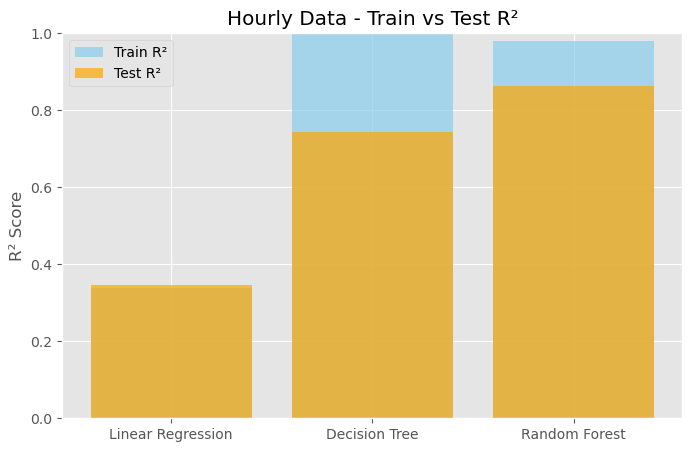

In [43]:
def plot_train_test_r2(df, dataset_name="Dataset"):
    plt.figure(figsize=(8,5))
    plt.bar(df['Model'], df['Train_R2'], alpha=0.7, label='Train R²', color='skyblue')
    plt.bar(df['Model'], df['Test_R2'], alpha=0.7, label='Test R²', color='orange')
    plt.title(f"{dataset_name} - Train vs Test R²")
    plt.ylabel("R² Score")
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

# Hourly
plot_train_test_r2(hour_results_test, "Hourly Data")

In [49]:
last_row = X_test_hr.iloc[-1:].copy()

In [50]:
predictions = []

start_hour =4 

for i in range(1, 7):
    next_hour = (start_hour + i) % 24
    last_row['hr'] = next_hour

    pred = rf_hour.predict(last_row)[0]
    predictions.append([next_hour, int(round(pred))])

In [51]:
pred_df = pd.DataFrame(
    predictions,
    columns=['Hour', 'Predicted_Count']
)

pred_df

,Hour,Predicted_Count
0,5,30
1,6,121
2,7,364
3,8,599
4,9,286
5,10,141


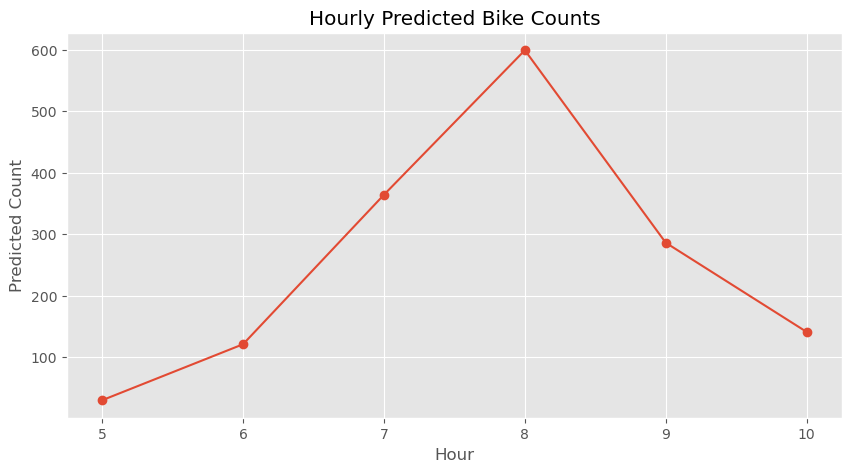

In [53]:

plt.figure(figsize=(10,5))
plt.plot(
    pred_df['Hour'],
    pred_df['Predicted_Count'],
    marker='o'
)

plt.title("Hourly Predicted Bike Counts")
plt.xlabel("Hour")
plt.ylabel("Predicted Count")
plt.xticks(pred_df['Hour'])
plt.grid(True)
plt.show()
